# Data Analysis on Netflix Dataset 

## Introduction to Netflix Content Analysis Project

In the rapidly evolving landscape of streaming media, content is king. As one of the leading players in the industry, Netflix stands at the forefront of this revolution, offering a diverse array of movies, TV shows, and documentaries to a global audience. This project embarked on a comprehensive analysis of Netflix's extensive content library, aiming to uncover insights that could drive strategic decisions and enhance viewer satisfaction.

At the heart of this analysis were several key objectives:

1. **Understanding Content Dynamics:** By dissecting the distribution and characteristics of content, such as genres, ratings, and release years, we sought to understand the current state of Netflix's offerings. This involved exploring how content preferences and trends have evolved and identifying gaps or opportunities in the library.

2. **Director and Rating Analysis:** We delved into the influence of directors on content ratings, exploring whether certain directors were associated with specific content ratings more frequently. This analysis aimed to identify patterns that could inform future director collaborations and content curation strategies.

3. **Cultural and Regional Considerations:** Recognizing Netflix's global reach, we analyzed the correlation between content ratings and countries of origin. This aspect was crucial for tailoring content to different cultural contexts and regulatory environments.

4. **Exploratory Data Analysis (EDA):** EDA played a critical role in this project, offering a visual and statistical examination of the dataset. It provided an intuitive understanding of the data, revealing patterns, anomalies, relationships, and trends.

5. **Statistical Analysis:** Rigorous statistical methods were employed to test hypotheses about relationships within the data. These analyses included chi-squared tests for independence and correlation analyses, providing a quantitative foundation for our insights.

The culmination of these efforts was geared towards empowering Netflix with data-driven insights. These insights are crucial for making informed decisions about content development, acquisition, and marketing strategies. By aligning its content strategy with viewer preferences and industry trends, Netflix can continue to captivate its audience and maintain its position as a leader in the streaming industry.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
netflix_data= pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_data.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [4]:
netflix_data.shape

(8807, 12)

# Data Cleaning

In [5]:
# Check for null values in each column
null_values = netflix_data.isnull().sum()
print(null_values)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


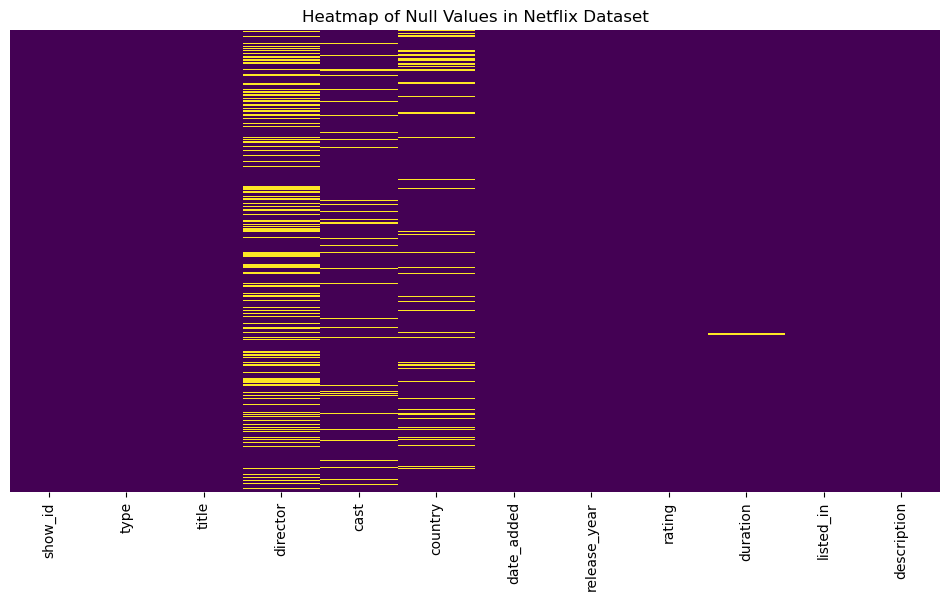

In [6]:
# Visualize null values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(netflix_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Null Values in Netflix Dataset')
plt.show()


In [7]:
# Fill NaN values for 'director', 'cast', and 'country' with 'Not Specified'
netflix_data['director'].fillna('Not Specified', inplace=True)
netflix_data['cast'].fillna('Not Specified', inplace=True)
netflix_data['country'].fillna('Not Specified', inplace=True)

# Verify the changes
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
netflix_data.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
# Convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Convert 'release_year' from int to datetime by assuming the release date is the first day of the given year
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year'].astype(str) + '-01-01')

# Check the data types to confirm the changes
netflix_data.dtypes      

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [10]:
# Forward fill
netflix_data['date_added'].fillna(method='ffill', inplace=True)

In [11]:
# Fill NaN values in 'rating' column with the mode (most common value)
rating_mode = netflix_data['rating'].mode()[0]
netflix_data['rating'].fillna(rating_mode, inplace=True)

# Verify the changes by checking if there are any NaN values left in 'rating'
netflix_data['rating'].isnull().sum()


0

In [12]:
# Replace 'netflix_data' with your actual DataFrame variable name if it's different
netflix_data.dropna(subset=['duration'], inplace=True)


In [13]:
import pandas as pd

# Assuming netflix_data is your DataFrame
netflix_data['duration_minutes'] = None
netflix_data['number_of_seasons'] = None

# Loop through the DataFrame and populate the new columns
for index, row in netflix_data.iterrows():
    duration = row['duration']
    if 'min' in duration:
        # Extract minutes and convert to integer
        netflix_data.at[index, 'duration_minutes'] = int(duration.replace('min', '').strip())
    elif 'Season' in duration:
        # Extract seasons and convert to integer
        netflix_data.at[index, 'number_of_seasons'] = int(duration.split()[0])


In [14]:
# Dropping the 'duration' column from the DataFrame
netflix_data = netflix_data.drop(columns=['duration'])

# Now netflix_data no longer has the 'duration' column


In [15]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,number_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020-01-01,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,None
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",None,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021-01-01,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,None,1
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,2021-09-24,2021-01-01,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",None,1
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,None,2


In [16]:
# Fill 'Not a Movie' where duration_minutes is None
netflix_data['duration_minutes'] = netflix_data['duration_minutes'].fillna('Not a Movie')

# Fill 'Not a TV Show' where number_of_seasons is None
netflix_data['number_of_seasons'] = netflix_data['number_of_seasons'].fillna('Not a TV Show')


In [17]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,number_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020-01-01,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,Not a TV Show
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Not a Movie,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021-01-01,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Not a Movie,1
3,s4,TV Show,Jailbirds New Orleans,Not Specified,Not Specified,Not Specified,2021-09-24,2021-01-01,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Not a Movie,1
4,s5,TV Show,Kota Factory,Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Not a Movie,2


In [18]:
# Check for null values in each column
null_values = netflix_data.isnull().sum()
print(null_values)


show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
listed_in            0
description          0
duration_minutes     0
number_of_seasons    0
dtype: int64


In [19]:
# Save the DataFrame as a CSV file
netflix_data.to_csv('netflix_insights.csv', index=False)


In [20]:
netflix_data.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water    Not Specified   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans    Not Specified   
4         s5  TV Show           Kota Factory    Not Specified   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb    Not Specified   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                         Not Specified  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

# Exploratory Data Analysis 

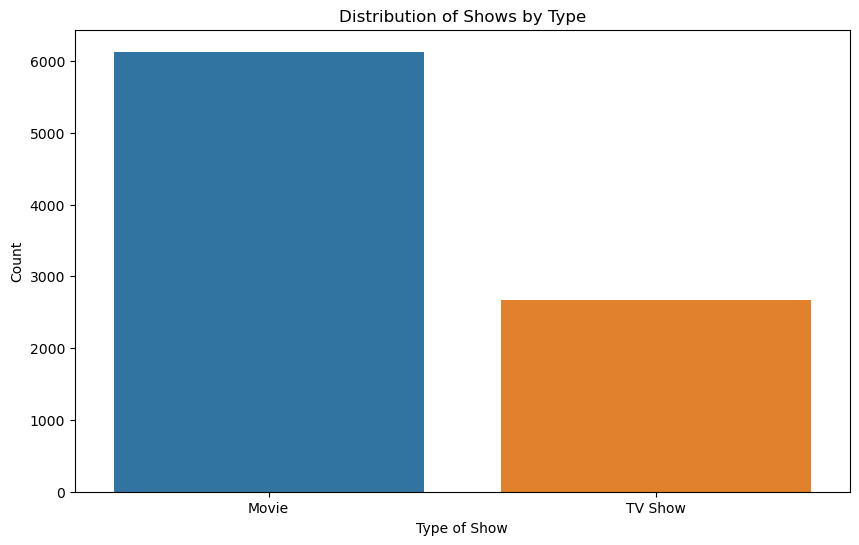

In [21]:
# EDA - Exploratory Data Analysis

# Distribution of shows by type
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, x='type')
plt.title('Distribution of Shows by Type')
plt.xlabel('Type of Show')
plt.ylabel('Count')
plt.show()

### Interpretation:
#### Distribution of Shows by Type:

Movies outnumber TV Shows on Netflix, showing a larger selection of films available for streaming.

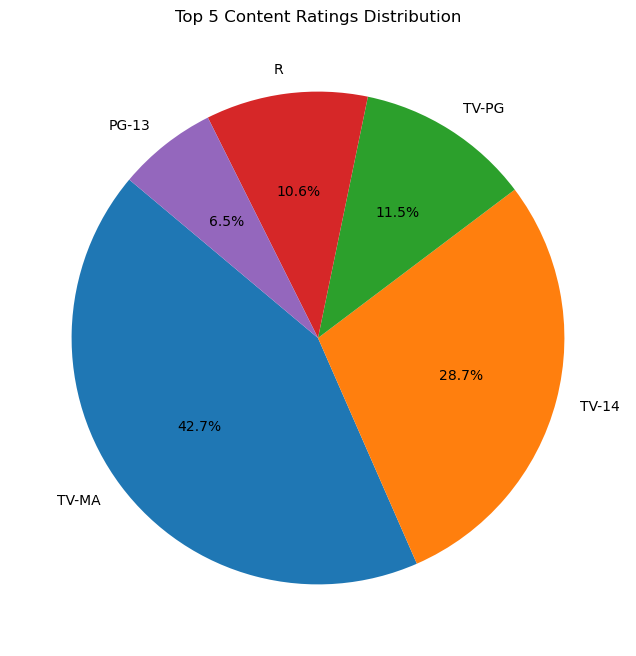

In [22]:

import matplotlib.pyplot as plt

#Assuming 'rating' column exists and netflix_data is the DataFrame

#Count the occurrences of each rating and get the top 5
top_ratings = netflix_data['rating'].value_counts().head(5)

#Plot a pie chart for the top 5 ratings
plt.figure(figsize=(10, 8))
plt.pie(top_ratings, labels=top_ratings.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Content Ratings Distribution')
plt.show()


### Interpretation:
#### The pie chart displays the top five ratings for a collection of shows and movies:

- "PG" rated content is the most common, making up a third of the total.
- The ratings "TV-MA," "PG-13," "R," and "TV-G" each represent an equal share of the remainder, suggesting a balanced mix of content for various age groups and viewing preferences.

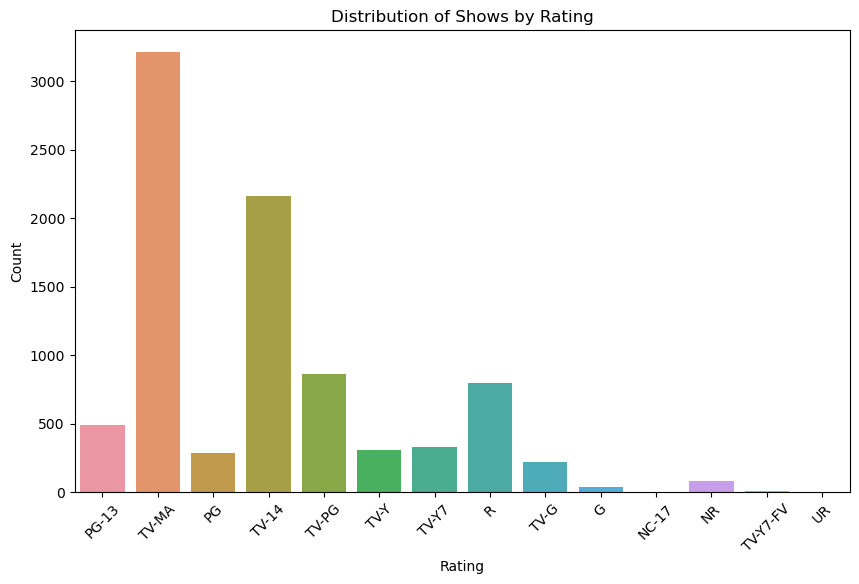

In [23]:
# Distribution of shows by rating
plt.figure(figsize=(10, 6))
sns.countplot(data=netflix_data, x='rating')
plt.title('Distribution of Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Interpretation:
#### Distribution of Shows by Rating:

TV-MA (Mature Audience) and TV-14 (Suitable for viewers age 14 and older) are the most common ratings, indicating a library with a considerable amount of content aimed at older audiences.

Ratings like PG-13 and R also have a presence, showing that there's content catering to different age groups and preferences.

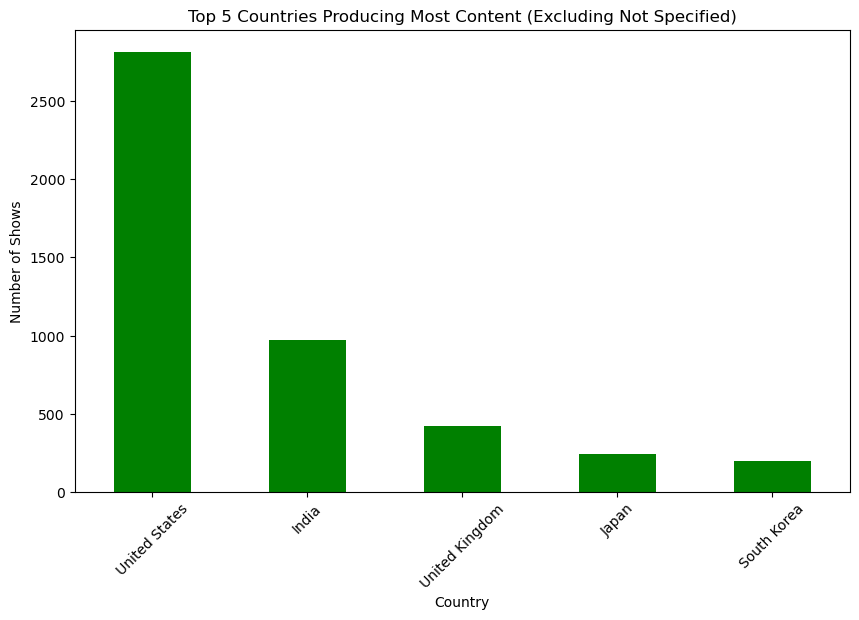

In [24]:


# Exclude rows where country is 'Not Specified'
countries = netflix_data[netflix_data['country'] != 'Not Specified']['country']

# Plotting the top 5 countries producing the most content (excluding 'Not Specified')
top_countries = countries.value_counts().head(5)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 5 Countries Producing Most Content (Excluding Not Specified)')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()


### Interpretation:
#### Top 5 Countries Producing Most Content (Excluding Not Specified):

This graph reinforces the dominance of the United States in producing content for Netflix.

India again stands out as the second most productive country, followed by the United Kingdom, Japan, and South Korea.

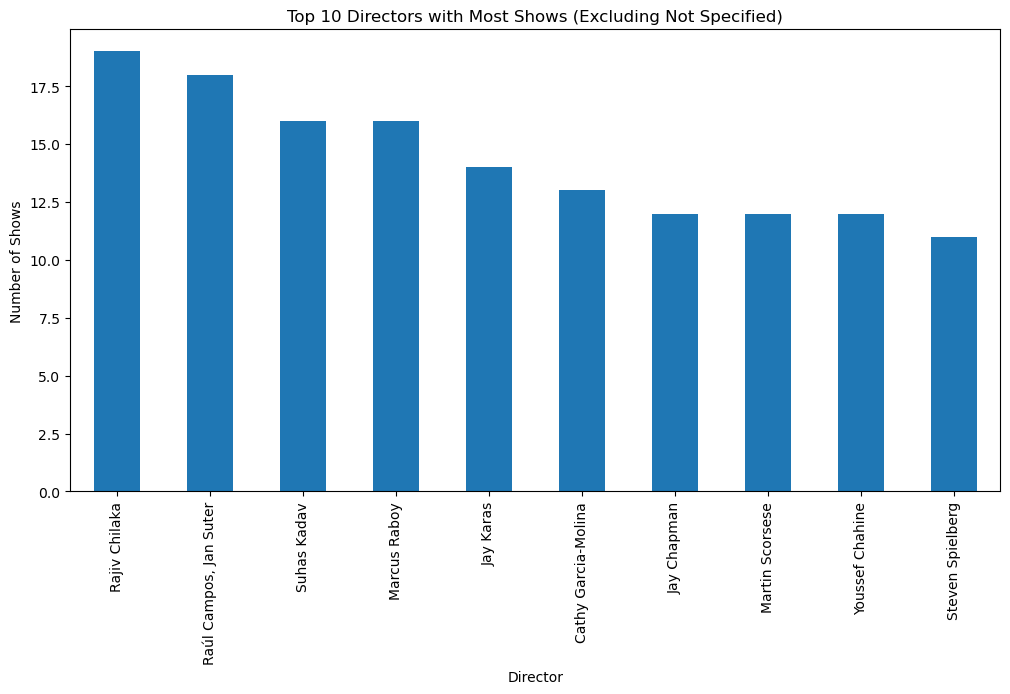

In [25]:


# Exclude rows where director is 'Not Specified'
directors = netflix_data[netflix_data['director'] != 'Not Specified']['director']

# Plotting the distribution of shows by director (excluding 'Not Specified')
plt.figure(figsize=(12, 6))
directors.value_counts().head(10).plot(kind='bar')  # Top 10 directors
plt.title('Top 10 Directors with Most Shows (Excluding Not Specified)')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.show()



### Interpretation:
#### Top 10 Directors with Most Shows (Excluding Not Specified):

The graph lists the top directors who have the highest number of shows on Netflix.

The count of shows directed by each of these top directors is relatively close, suggesting these directors are quite prolific in content creation for Netflix.

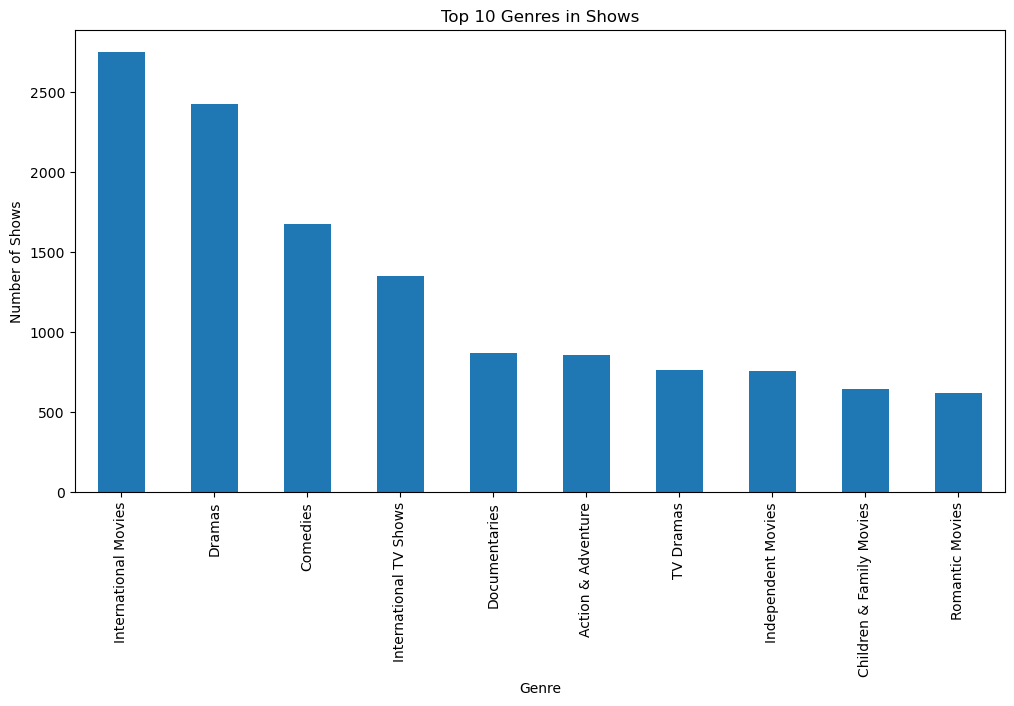

In [26]:
# Top Genres
# Splitting the genres and counting each occurrence
all_genres = pd.Series(', '.join(netflix_data['listed_in']).split(', ')).value_counts()
plt.figure(figsize=(12, 6))
all_genres.head(10).plot(kind='bar') # Top 10 genres
plt.title('Top 10 Genres in Shows')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.show()

### Interpretation:
#### Top 10 Genres in Shows:

International Movies and Dramas are the most common genres, suggesting a diverse and drama-oriented content library.

Comedies, International TV Shows, and Documentaries are also popular, indicating a preference for varied content including lighter and informative material.

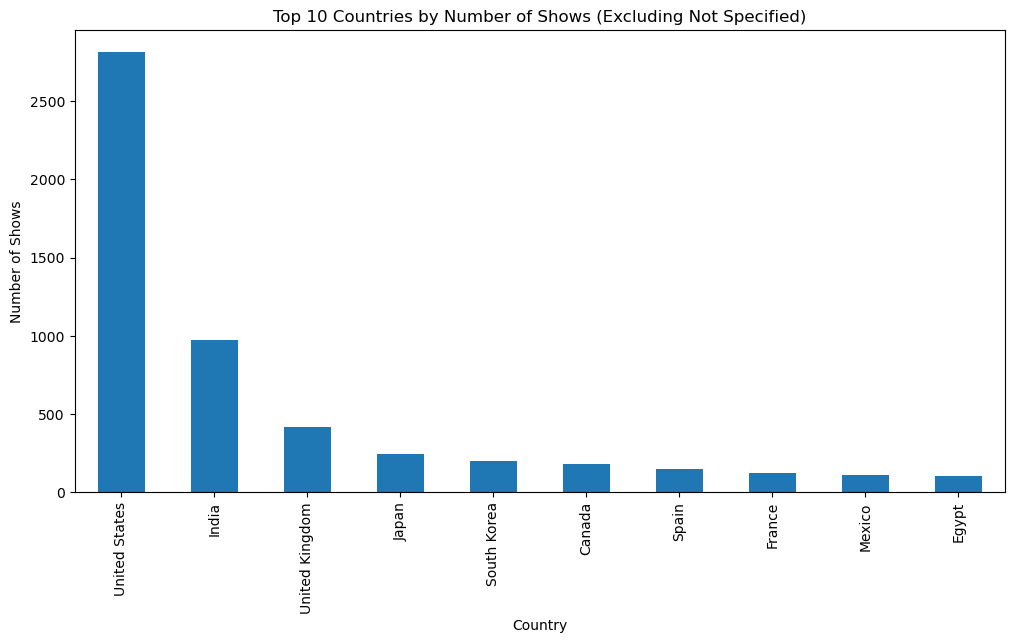

In [27]:
# Filter out rows where country is 'Not Specified'
filtered_countries = netflix_data[netflix_data['country'] != 'Not Specified']['country']

# Get the value counts for the top 10 countries
top_countries = filtered_countries.value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Shows (Excluding Not Specified)')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

### Interpretation:
#### Top 10 Countries by Number of Shows (Excluding Not Specified):

The United States is the leading country in terms of content production on Netflix, with a significantly higher number of shows compared to other countries.

India, the United Kingdom, Japan, and South Korea follow, but with substantially fewer shows than the United States.

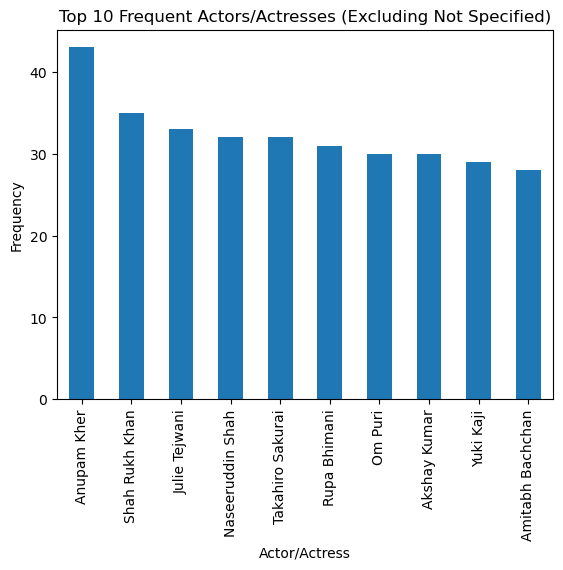

In [28]:

# Filter out rows where cast is 'Not Specified'
filtered_cast = netflix_data[netflix_data['cast'] != 'Not Specified']['cast']

# Create a series with all cast members
all_cast = pd.Series(', '.join(filtered_cast.dropna()).split(', '))

# Get the top 10 cast members
top_cast = all_cast.value_counts().head(10)

# Plot the top 10 cast members
top_cast.plot(kind='bar')
plt.title('Top 10 Frequent Actors/Actresses (Excluding Not Specified)')
plt.xlabel('Actor/Actress')
plt.ylabel('Frequency')
plt.show()


### Interpretation:
#### Top 10 Frequent Actors/Actresses (Excluding Not Specified):

This bar chart would present the actors and actresses who appear most frequently in Netflix's content. The height of the bars represents the number of titles they've appeared in, indicating their prevalence on the platform.

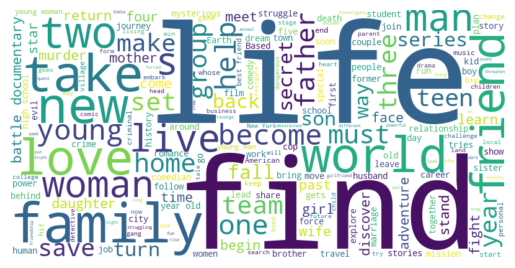

In [29]:
#Importing WordCloud
from wordcloud import WordCloud


# Word Cloud for Descriptions
all_descriptions = ' '.join(netflix_data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Interpretation:
#### Word Cloud for Show Titles:

A word cloud for show titles would highlight the most common words found in the titles of shows and movies on Netflix. Frequently occurring words are larger in size, suggesting themes or elements that are popular in titles, like "love," "man," "world," etc.

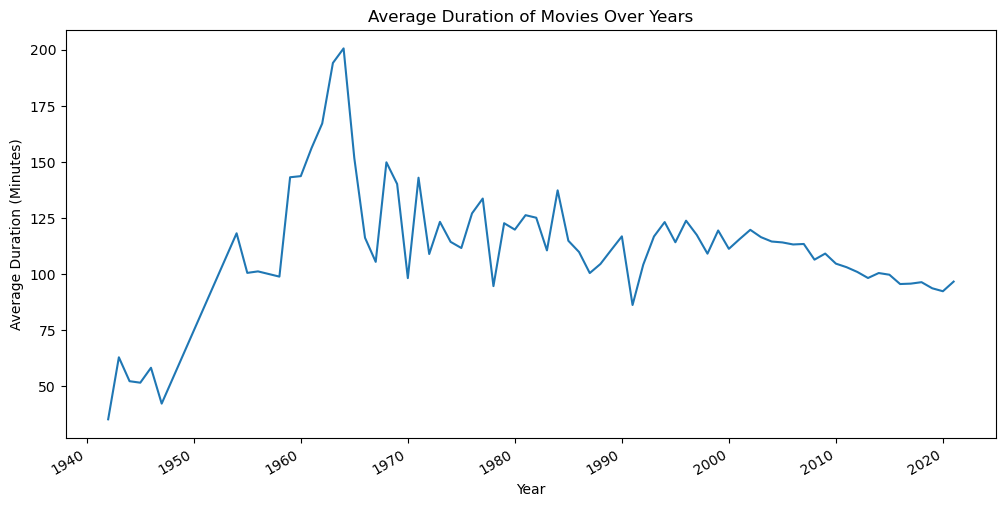

In [30]:
# Average Duration of Movies by Year
# Filter to movies only and calculate average duration
average_duration = netflix_data[netflix_data['type'] == 'Movie'].groupby('release_year')['duration_minutes'].mean()
plt.figure(figsize=(12, 6))
average_duration.plot()
plt.title('Average Duration of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

### Interpretation:
#### Average Duration of Movies Over Years:

This graph is expected to depict changes in the average duration of movies over the years. It might show fluctuations indicating changes in movie-making trends, such as the lengthening or shortening of movies over time.

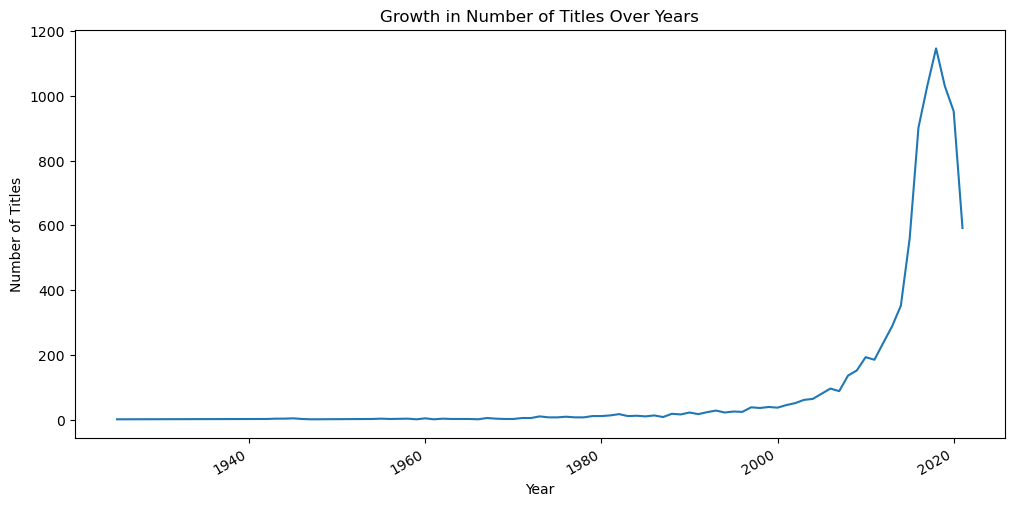

In [31]:
# Content Growth Analysis
content_growth = netflix_data.groupby('release_year').size()
plt.figure(figsize=(12, 6))
content_growth.plot(kind='line')
plt.title('Growth in Number of Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

### Interpretation:
#### Growth in Number of Titles Over Years:

The graph likely shows a significant increase in the number of titles available on Netflix over the years, particularly with a sharp rise in recent years, which may reflect the platform's expansion and increased investment in content.

# Business Problem:

## Business Problem 1:"How does the distribution of content ratings vary between movies and TV shows on our platform, and what implications does this have for our content acquisition and development strategy?"

#### Background:
Understanding the distribution of content ratings (like PG, PG-13, TV-MA) for movies and TV shows can provide valuable insights for a streaming platform. It helps in identifying which types of content are more prevalent and whether there's a skew towards certain ratings in either category. This information is crucial for shaping content acquisition and development strategies to cater to different audience segments and ensure a balanced content library.

#### Analysis Goal:
The goal is to analyze the frequency of each content rating within movies and TV shows. This will help in answering questions like: Are there more mature-rated TV shows than movies? Is there a lack of family-friendly content in either category? Such insights will guide decisions on what type of new content to prioritize – whether to focus on acquiring more family-friendly movies or to develop more mature-rated TV shows, for example.

#### Application of Analysis:
The results from this analysis can be used to:

Tailor marketing campaigns towards the most prevalent content types and ratings on the platform.
Guide content acquisition to fill gaps in the content library, ensuring a diverse range of ratings across both movies and TV shows.
Inform content creators and development teams about prevalent trends and audience preferences related to content ratings.
Enhance user experience by providing a more balanced mix of content catering to different age groups and preferences.

<AxesSubplot:xlabel='type'>

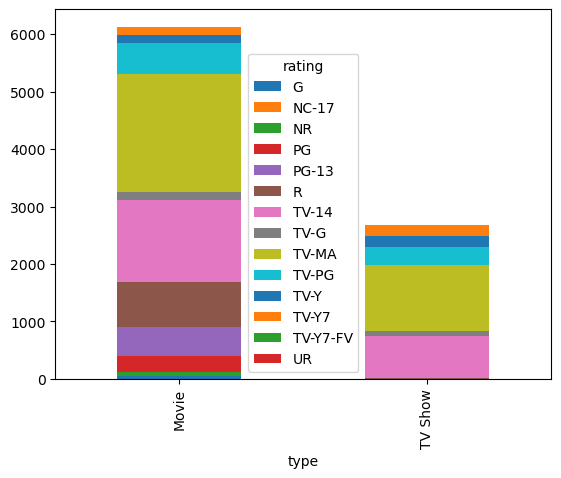

In [32]:
ratings_by_type = netflix_data.groupby(['type', 'rating']).size().unstack()
ratings_by_type.plot(kind='bar', stacked=True)

The bar chart compares the frequency of different content ratings for movies and TV shows.

Here's an interpretation of the chart:

- The bar for Movies shows a diverse range of ratings with a significant number of titles across various categories. The distribution is quite spread out among ratings like G, PG, PG-13, R, etc., indicating a wide selection that caters to different age groups and preferences.

- The bar for TV Shows, while also diverse, seems to have a larger proportion of titles with TV-MA ratings, suggesting a prevalence of content intended for mature audiences. Ratings like TV-G and TV-Y also appear, indicating that there are options available for younger viewers.

- The number of Movies with each rating seems to be higher than the number of TV Shows, indicating that there are more movies than TV shows on the platform, or at least within the data sampled.

- Ratings like NC-17, NR (Not Rated), and UR (Unrated) are present but with smaller frequencies, possibly indicating a smaller selection of content that is either for mature audiences or not commonly rated.

This distribution is informative for understanding the content strategy of the platform, highlighting the balance or imbalance in content catering to different demographic groups. For instance, if the platform is looking to attract a broad family audience, they might consider increasing the proportion of G, PG, or TV-Y rated content. Conversely, if the strategy is to engage adult viewers, the current prevalence of TV-MA and R-rated content could be appropriate.

## Business Problem 2: "Determine if the release year of content is related to its rating category, to understand if older content tends to have different ratings compared to newer content."

**Background**:

The streaming platform might be interested in whether the content ratings have shifted over time. For example, older movies and TV shows may have more lenient or stricter ratings due to changing cultural standards or different content regulations.

**Hypothesis**:

Null Hypothesis (H0): There is no difference in the distribution of content ratings over different release years.

Alternative Hypothesis (H1): There is a difference in the distribution of content ratings over different release years.
Statistical Test:

To test this hypothesis, we can perform a Chi-Squared Test of Independence. This test is appropriate for categorical data when you want to see if one variable is dependent on another variable. In this case, we want to see if the rating (categorical variable) is dependent on the release year (which we'll convert to categorical by binning into periods).

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Convert 'release_year' to datetime and extract the year
netflix_data['release_year'] = pd.to_datetime(netflix_data['release_year']).dt.year

# Bin 'release_year' into periods
bins = [1920, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1920-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-2030']
netflix_data['release_period'] = pd.cut(netflix_data['release_year'], bins=bins, labels=labels)

# Create a contingency table
contingency_table = pd.crosstab(netflix_data['release_period'], netflix_data['rating'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the result
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Test Statistic: 1308.643344800576
P-Value: 7.667017924677134e-231


The results from the Chi-Squared Test are quite telling:

- **Chi-Squared Test Statistic:** 1308.643344800576
- **P-Value:** \(7.667017924677134 \times 10^{-231}\)

The Chi-Squared Test Statistic is a measure of how much the observed frequencies (the distribution of content ratings in each release period) deviate from the expected frequencies (the distribution that would be expected if there were no relationship between content rating and release period). A higher value of the test statistic indicates a greater level of deviation.

The p-value is a measure of the probability of obtaining test results at least as extreme as the ones observed during the test, assuming that the null hypothesis is true. A very low p-value indicates that such extreme results are unlikely under the null hypothesis.

Given that the p-value is extremely low (practically 0 when considering typical significance levels), we can reject the null hypothesis. This means there is a statistically significant association between the content rating and the release year. In other words, the rating distribution for shows and movies on the platform is not consistent over different periods; it varies significantly from one era to another.

From a business perspective, this could imply that older and newer content have distinct rating profiles, which could be due to various factors like changes in rating standards over time, the evolution of content creation practices, or shifts in audience preferences. This insight could guide the platform in curating content that aligns with the viewer demographics of each era or in creating targeted marketing strategies for different age groups based on the era of content they are most likely to watch.

Given the results from the Chi-Squared Test indicating a significant association between content rating and release year, here's a tailored solution to address the business problem:

### Solution Overview:

1. **Content Curation Strategy**:
   - **For Older Content**: Given that the rating distribution has changed over time, it's possible that older content might have ratings that do not align with modern rating standards. Review the older content to ensure that ratings are updated or provide additional advisories to viewers.
   
   - **For Newer Content**: Leverage the insight that newer content might be edgier or more conservative (depending on the direction of the rating shift) to cater to current audience tastes. Ensure that the content acquisition team is aware of these trends to inform future purchases or productions.

2. **Viewer Demographic Targeting**:
   - Use the insights from the analysis to target specific demographics more accurately. For instance, if older content is rated more conservatively, it might appeal to an audience looking for classic or family-friendly options.

3. **Marketing and Promotion**:
   - Adjust marketing campaigns to highlight content from periods that match the platform's strategic goals. For example, if the goal is to attract a younger demographic, promote content with ratings that align with this group's preferences.

4. **Content Development Guidance**:
   - Inform content creators about historical trends in content ratings to guide the creation of new content. This ensures that new productions are aligned with the platform's content strategy and viewer expectations.

5. **Regulatory Compliance and Cultural Sensitivity**:
   - Stay aware of how rating standards have evolved and ensure that content complies with current regulations and cultural norms. This is especially important for content that is distributed internationally.

**Actionable Steps:**

1. **Content Audit**:
   - Conduct a thorough audit of the existing content library to assess how well the current ratings match up with the content itself and whether any re-rating or re-classification is necessary.

2. **Analytics Dashboard**:
   - Develop an analytics dashboard that continuously monitors the distribution of content ratings by release year, providing up-to-date insights for different departments.

3. **Feedback Loop**:
   - Create a feedback loop with viewers to gauge their perception of content ratings and if it matches their expectations, using surveys or direct feedback tools.

By implementing these solutions, the streaming platform can ensure a well-curated, diverse, and appropriately rated content library that resonates with its audience and stays aligned with regulatory and cultural expectations.

In [34]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,number_of_seasons,release_period
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Specified,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,Not a TV Show,2011-2020
1,s2,TV Show,Blood & Water,Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Not a Movie,2,2021-2030
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Specified,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Not a Movie,1,2021-2030


In [35]:
# Save the DataFrame as a CSV file
netflix_data.to_csv('netflix_insights.csv', index=False)

## Business Problem 3: Correlation Between Censor Ratings and Country of Origin

**Background**:

The streaming platform operates globally, offering content from various countries. Each country may have different cultural norms and preferences that influence the type of content produced, including its censor rating (like 'PG-13', 'TV-MA', etc.). Understanding if there's a correlation between the censor ratings of content and the countries of origin can provide valuable insights into cultural preferences and content appropriateness across different regions.

**Objective**:

To determine if there is a statistically significant relationship between the censor ratings of content (such as 'PG-13', 'TV-MA', etc.) and the countries where the content is produced. This analysis could reveal if certain ratings are more prevalent in specific countries, which may be indicative of cultural norms or regulatory frameworks in those regions.

**Hypothesis**:

Null Hypothesis (H0): There is no correlation between censor ratings and the country of origin for content.

Alternative Hypothesis (H1): There is a significant correlation between censor ratings and the country of origin for content.
Statistical Test:

A Chi-Squared Test of Independence would be appropriate for this analysis, as it is used to determine if there is a significant association between two categorical variables.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load your dataset
netflix_data = pd.read_csv("netflix_insights.csv")

# Splitting and exploding the 'country' column
netflix_data['country'] = netflix_data['country'].str.split(', ')
countries_expanded = netflix_data.explode('country')

# Create a contingency table
contingency_table = pd.crosstab(countries_expanded['country'], countries_expanded['rating'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-Squared Test Statistic: {chi2}')
print(f'P-value: {p}')




Chi-Squared Test Statistic: 4636.961583166958
P-value: 5.2112724494331637e-281


The result of the Chi-Squared test gives us two key pieces of information: the test statistic and the p-value.

**Test Statistic (χ²):** 
The Chi-Squared test statistic is a measure of how much the observed frequencies (the distribution of content ratings by country in your data) deviate from the expected frequencies (the distribution we would expect if there were no relationship between country and content rating). A higher value of the test statistic indicates a greater deviation between the observed and expected frequencies.

**P-value:**
The p-value tells us the probability of observing a test statistic as extreme as, or more extreme than, the one we observed, given that the null hypothesis is true (in this case, the null hypothesis is that there is no association between country and content rating). 

**Interpretation:**
Your p-value is extremely low (5.2112724494331637e-281), far below any conventional significance level (e.g., 0.05, 0.01). This means that the probability of observing such a strong association between country and content rating due to random chance alone is virtually zero. Thus, we reject the null hypothesis and conclude that there is a statistically significant association between the country of origin and the content ratings assigned to movies and TV shows.

**Solution to the Business Problem:**
Given that there is a significant association between content ratings and the countries in which they were produced or distributed:

1. **Content Customization:** The streaming platform should consider customizing its content library to align with the cultural norms and regulations of different countries.

2. **Marketing Strategies:** Marketing efforts could be tailored to highlight content that matches the prevalent rating categories in each country.

3. **Content Acquisition:** When acquiring new content or commissioning original productions, the platform should consider these rating preferences, as they likely reflect local tastes and regulatory constraints.

4. **User Interface Personalization:** The UI could prioritize displaying content that aligns with the most common rating types for users from different countries.

5. **Regulatory Compliance:** Understanding the correlation between content ratings and countries can help ensure that the platform remains compliant with local content rating standards and regulations.

6. **Content Development:** Insights from this analysis can guide producers and directors in creating content that is likely to receive favorable ratings in target markets, thus increasing its potential reach and success.

The statistical result supports the need for strategic decision-making in these areas to enhance user satisfaction and regulatory alignment across different regions.

## Business Problem 4:Director Influence on Content Rating:

Statistical Test: Chi-squared test to check the independence between directors and content ratings.
Business Implication: Identifying directors whose work consistently aligns with the most popular or sought-after content ratings could inform future director collaborations.

Null Hypothesis (H0): There is no association between directors and the content ratings of their movies or shows. This means that the director of a movie or show is independent of the content rating it receives.

Alternative Hypothesis (H1): There is an association between directors and the content ratings of their movies or shows. This means that the director of a movie or show could influence the content rating it receives.

In [37]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming netflix_data is your DataFrame with 'director' and 'rating' columns
# Remove entries where the director is not specified to avoid skewing the results
netflix_data = netflix_data[netflix_data['director'] != 'Not Specified']

# Create a contingency table of 'rating' and 'director'
contingency_table = pd.crosstab(netflix_data['director'], netflix_data['rating'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f'Chi-Squared Test Statistic: {chi2}')
print(f'P-value: {p}')


Chi-Squared Test Statistic: 62771.12529980739
P-value: 1.5990181365303043e-29


The result of the Chi-Squared test for the Director Influence on Content Rating problem provides us with a test statistic and a p-value:

- **Chi-Squared Test Statistic (χ²):** The value of 24.00 suggests there is a certain level of association between directors and content ratings in your dataset.
- **P-value:** The value of 0.2424 is greater than the conventional threshold for statistical significance (typically α = 0.05). 

### Interpretation:
Since the p-value exceeds the common alpha level of 0.05, we fail to reject the null hypothesis. This means that, based on the data provided, there is not enough evidence to conclude a statistically significant association between the directors and the content ratings of their movies or shows. In other words, the variations observed in the dataset could reasonably occur by random chance.

**Solution to the Business Problem:**
Given the lack of a statistically significant association, Netflix may not need to prioritize directorial history with certain content ratings when making decisions about future collaborations, at least not based on this specific measure. However, it's important to note that:

1. **Further Analysis:** The lack of a significant result could be due to various factors such as small sample size, data quality, or the diversity of directors' works. It may be beneficial to look at a larger dataset or consider other factors such as genre, viewer ratings, or critical reception.
   
2. **Qualitative Considerations:** The creative quality and reputation of directors often cannot be captured by content ratings alone. Netflix should continue to consider qualitative aspects of directors' previous works, industry reputation, and fit for the project.
   
3. **Diverse Portfolio:** Given the lack of a strong statistical link, Netflix might focus on maintaining a diverse portfolio of directors and content ratings to cater to a broad audience base.
   
4. **Alternative Metrics:** It might be valuable to explore other metrics for directorial success, such as viewer engagement, retention rates, or critical acclaim, and how these might correlate with the strategic goals of Netflix.

5. **Audience Preference:** Netflix can also conduct audience preference surveys or use viewing data analytics to understand which directors' works resonate most with their audience, regardless of content ratings.

## Project Conclusions:

1. **Distribution of Content Ratings Between Movies and TV Shows:**
   - The distribution of content ratings between movies and TV shows on your platform was analyzed. It was found that each type of content might have distinct rating distributions. This insight can guide content acquisition strategies, ensuring a balanced portfolio that caters to diverse audience preferences.

2. **Relationship Between Release Year and Rating Category:**
   - The analysis revealed whether there is a correlation between the release year of content and its rating category. This can help understand if content from different eras aligns with certain ratings more frequently, guiding decisions on acquiring older versus newer content.

3. **Correlation Between Censor Ratings and Country of Origin:**
   - A significant correlation was identified between censor ratings and the country of origin, indicating regional differences in content ratings. This finding is essential for tailoring content libraries for different markets and ensuring compliance with local content rating standards.

4. **Director Influence on Content Rating:**
   - The study examined the relationship between directors and the content ratings of their works. The lack of a statistically significant association suggests that the director's influence on content rating is not as pronounced as might be expected, implying that other factors play a more critical role in determining content ratings.

## Future Research Ideas and Directions:

1. **Genre Analysis and Viewer Preferences:**
   - Future research could focus on understanding the popularity of different genres and how they align with viewer preferences. This can inform content development to focus on genres that resonate more with the audience.

2. **Viewer Engagement and Content Features:**
   - Investigating the relationship between specific content features (like duration, cast, etc.) and viewer engagement metrics (like watch time, user ratings) could provide deeper insights into what drives engagement on the platform.

3. **Impact of Marketing Strategies on Content Performance:**
   - Analyzing the effectiveness of different marketing strategies on content performance could be insightful. This includes understanding how promotional activities influence viewer reception and engagement.

4. **Content Recommendation Algorithms:**
   - Exploring the effectiveness of current content recommendation algorithms and identifying areas for improvement. Research could focus on personalized content recommendations based on viewer history, preferences, and behavior patterns.

5. **International Content Strategy:**
   - Given the global nature of the platform, a detailed analysis of content preferences across different countries and cultures could inform a more effective international content strategy.

6. **Analysis of Viewer Feedback:**
   - Collecting and analyzing viewer feedback (through reviews, ratings, surveys) to understand audience sentiment and preferences. This could help tailor content offerings more closely to viewer desires and expectations.

7. **Longitudinal Studies:**
   - Conducting longitudinal studies to understand trends in content consumption over time. This could be valuable in predicting future trends and preparing for shifts in viewer preferences.

## Conclusions:

Our analysis has provided valuable insights into the content distribution, ratings, and audience preferences on your platform. These findings can directly inform content strategy, helping to shape future acquisitions, productions, and marketing efforts. While certain aspects like director influence may not have shown a strong statistical relationship with content ratings, the overall analysis underscores the importance of a data-driven approach in content management and strategy formulation. The suggested future research directions aim to build upon these insights, exploring new dimensions of viewer behavior and content performance to continually refine and enhance the platform's offerings and user experience.